<a href="https://colab.research.google.com/github/snigdhanigam-cpu/Bicycle-routing-/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Submission instruction: read and follow carefully!

1. Make a copy of this notebook
2. Complete the tasks
3. Make the copy editable by instructor (shi.feng@gwu.edu) and grader (justin.mittereder@gwmail.gwu.edu).
4. Send an email to **grader (not instructor)** with link to your copy of the notebook with title **"CSCI-4364/6364 S26 - Assignment 1 - [YOUR GWID]"**.

# Assignment 1

Your task in this assignment is to manually implement a function to compute the gradient for a made-up optimization problem. The loss landscape of this optimization problem is defined by a quadratic function instead of the usual objective function + dataset. The loss landscape is visualized by the contour map below, where darker color indicate lower loss. By the end of the assignment, you should be able to produce the arrows, which visualizes running gradient descent to solve this problem.

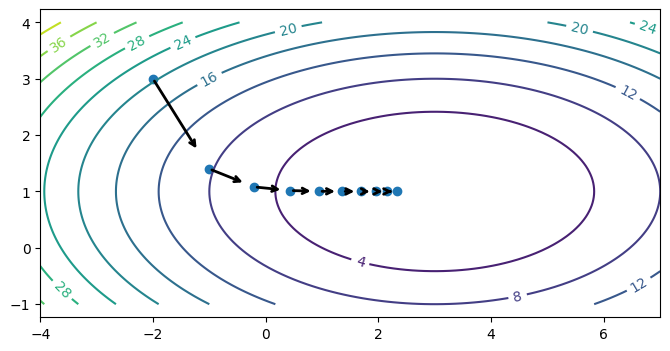

## Warm-up: manual implementation of gradient descent for a one-parameter quadratic function.

The optimization problem that we will solve involves two parameters, with the plane representing the parameter space and a third dimension (visualized by the contour maps) for the loss values.

To warm up, let's see a simpler version of that with just one parameter, where the loss landscape is visualized by the curve, similar to what we saw in class.

In [ ]:
# importing necessary libraries

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 4]

The one-parameter function that defines the toy loss landscape is $0.5(2\theta-1)^2$. Again, this is a toy setting because the loss landscape does not involve a real dataset. It's just a function of $\theta$.


In [ ]:
import numpy as np

def quadratic_function(theta):
    """
    theta: scalar or 1D array
    returns: same shape as theta
    """
    theta = np.asarray(theta)
    return 0.5 * (2*theta - 1)**2

We can visualize this loss landscape by sweeping across the x-axis using `np.linspace`. Note that this is not practical in general for optimization problems involving many parameters.

In [ ]:
# visualization code. do not edit

thetas = np.linspace(-0.2,1,10)
f_vals = quadratic_function(thetas[:,np.newaxis])

plt.plot(thetas, f_vals)
plt.xlabel('Theta')
plt.ylabel('Objective value')
plt.title('Simple quadratic function')

Next, we implement the derivative. This quadratic function is derivable, and we can write out the derative as a closed-form mathematical equation.

$J(\theta) = 0.5(2\theta-1)^2 = 0.5 * (4\theta^2 - 4\theta + 1) = 2\theta^2 - 2\theta + 0.5$

The derivative of this is simple:

${\partial{J}{\theta}}/{\partial \theta} = 4\theta - 2$

Let's visualize the derivative at several points. The derivative should look like tangent lines.

In [ ]:
def quadratic_derivative(theta):
    """
    theta: scalar or 1D array
    returns: same shape as theta
    """
    theta = np.asarray(theta)
    return 4*theta - 2

In [ ]:
# visualization code. do not edit

thetas = np.linspace(-0.2, 1, 200)
f_vals = quadratic_function(thetas)

plt.plot(thetas, f_vals)
plt.xlabel("Theta")
plt.ylabel("Objective value")
plt.title("Simple quadratic function")

line_length = 0.2
pts = np.array([0.0, 0.5, 0.8])

f0s = quadratic_function(pts)
df0s = quadratic_derivative(pts)

plt.plot(thetas, f_vals)
for pt, f0, df0 in zip(pts, f0s, df0s):
    plt.annotate(
        '',
        xytext=(pt-line_length, f0-line_length*df0),
        xy=(pt+line_length, f0+line_length*df0),
        arrowprops={'arrowstyle': '-', 'lw': 1},
    )
plt.xlabel("Theta")
plt.ylabel("Objective value")
plt.title("Simple quadratic function")

## Your task: gradient of quadratic function with two parameters

We upgrade the above loss function from one parameter to two parameters:
$0.5*((2*\theta_1-2)^2 + (\theta_0-3)^2)$.

This is our new toy loss function. In order to visualize the loss function using level curves as below, we make theta0 and theta1 2d arrays rather than 1d arrays. This is a minor detail, the expression of the quadratic function in vector form remains the same.

In [ ]:
def quadratic_function2d(theta0, theta1):
    theta0 = np.asarray(theta0)
    theta1 = np.asarray(theta1)
    return 0.5 * ((2 * theta1 - 2) ** 2 + (theta0 - 3) ** 2)

# visualization code. do not edit
theta0_grid = np.linspace(-4, 7, 101)
theta1_grid = np.linspace(-1, 4, 101)

X, Y = np.meshgrid(theta0_grid, theta1_grid)  # both are (101, 101)
J_grid = quadratic_function2d(X, Y)

contours = plt.contour(X, Y, J_grid, 10)
plt.clabel(contours)
plt.axis("equal")
plt.xlabel("Theta0")
plt.ylabel("Theta1")
plt.title("Quadratic objective contours")

You task is to implement the `quadratic_derivative2d` function below.

In general, the gradient with respect to a parameter should be the exact same size as the parameter itself. If you are computing the gradient of a single scalar parameter, the gradient is also a scalar; if you are computing the gradient of a parameter vector, the gradient is a vector of the exact same shape, each indicating how sensitive the loss function is to a single scalar parameter in that vector.

The neat thing about how numpy handles linear algebra and vector operations is that they look exactly the same as scalar operations, so things look clean. This is conveninent, but in general you should be very careful about vector operations because just looking at the code you don't know the shapes of those vectors. This will be more important when we move to neural networks.

Below, we are visualizing the derivative at several random points. The derivative at each point should point towards lower loss.

In [ ]:
def quadratic_derivative2d(theta0, theta1):
    theta0 = np.asarray(theta0)
    theta1 = np.asarray(theta1)

    # --- student TODO: implement these two lines ---
    partial_derivative_0 =           # d/d theta0
    partial_derivative_1 =           # d/d theta1
    # ---------------------------------------------

    # Stack into gradient vectors
    grads = np.stack([partial_derivative_0, partial_derivative_1], axis=-1)
    return grads

# visualization code. do not edit
theta0_pts = np.array([2.3, -1.35, -2.3])
theta1_pts = np.array([2.4, -0.15, 2.75])

dfs = quadratic_derivative2d(theta0_pts, theta1_pts)  # (N, 2)
line_length = 0.2

contours = plt.contour(X, Y, J_grid, 10)
plt.clabel(contours)

for t0, t1, g in zip(theta0_pts, theta1_pts, dfs):
    plt.annotate(
        '',
        xytext=(t0, t1),
        xy=(t0 - line_length*g[0], t1 - line_length*g[1]),
        arrowprops={'arrowstyle': '->', 'lw': 2},
    )

plt.scatter(theta0_pts, theta1_pts)
plt.axis("equal")
plt.xlabel("Theta0")
plt.ylabel("Theta1")
plt.title("Gradients of the quadratic function")

If the gradients look reasonable in the figure above, where you see arrows pointing towards lower loss, then you are ready to use it in the following gradient descent algorithm.

In [ ]:
convergence_threshold = 2e-1
step_size = 1e-1
theta, theta_prev = np.array([[-2], [3]]), np.array([[0], [0]])
opt_pts = [theta.flatten()]
opt_grads = []

while np.linalg.norm(theta - theta_prev) > convergence_threshold:
    # we repeat this while the value of the function is decreasing
    theta_prev = theta
    gradient = quadratic_derivative2d(*theta).reshape([2,1])
    theta = theta_prev - step_size * gradient
    # also, record the points visited by gradient descent and their gradients
    opt_pts += [theta.flatten()]
    opt_grads += [gradient.flatten()]

opt_pts = np.array(opt_pts)
opt_grads = np.array(opt_grads)

contours = plt.contour(X, Y, J_grid, 10)
plt.clabel(contours)
plt.scatter(opt_pts[:,0], opt_pts[:,1])

for opt_pt, opt_grad in zip(opt_pts, opt_grads):
    plt.annotate('', xytext=(opt_pt[0], opt_pt[1]),
                 xy=(opt_pt[0]-0.8*step_size*opt_grad[0], opt_pt[1]-0.8*step_size*opt_grad[1]),
                 arrowprops={'arrowstyle': '->', 'lw': 2}, va='center', ha='center')

plt.axis('equal')

That's it!

In the next lecture we will see how to implement gradient functions for real loss functions defined by mean squared errors calculated on real datasets.